### LINEAR REGRESSION

In this notebook we'll going through the implementation and the details of a linear regression model.

In [2]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
def generate_simple_dataset(n: int, beta: int, std: int):
    
    x = np.arange(1, n+1)
    e = std * np.random.randn(n) 
    y = i + beta*x + e
    return x, y

In [50]:
n = 1000     # Number of samples
beta = 1    # Inclination of the line
std = 100    # Standard deviation

x, y = generate_simple_dataset(n, beta, std)

x = x.reshape((n, 1))
y = y.reshape((n, 1))

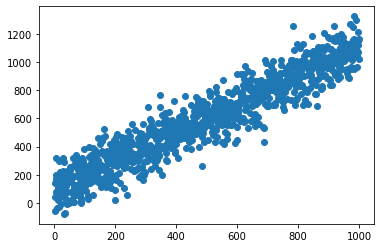

In [51]:
plt.scatter(x, y); plt.show()

In [8]:
def cost_function(X, y, theta):
    m, _ = X.shape                          # m --> number of samples
    h = np.matmul(X, theta)                 # h --> X (m, 2) * theta (2, 1), result on a vector (M x 1)
    J = np.sum(np.power(h - y, 2))/(2*m)    # J --> value of mean square error

    return J

Let's create a train-test split.

In [75]:
idxs = np.arange(0, n)
np.random.shuffle(idxs)

percentatge = 0.8

X_train, X_test = x[ idxs[:int(n*0.8)] ], x[ idxs[int(n*.8):] ]
y_train, y_test = y[ idxs[:int(n*0.8)] ], y[ idxs[int(n*.8):] ]

print(f'Samples train set: {X_train.shape[0]}\n\
Samples test set: {X_test.shape[0]}')

Samples train set: 800
Samples test set: 200


In [76]:
X_ones_train = np.ones((X_train.shape[0], 1))   # Create a vector of size n fill with ones
X_ones_test = np.ones((X_test.shape[0], 1))

X_train = np.append(X_ones_train, X_train, axis=1)  # Append the X matrix to the vector of ones
X_test  = np.append(X_ones_test, X_test, axis=1)

X_train[:5]

array([[  1., 778.],
       [  1., 106.],
       [  1., 371.],
       [  1., 594.],
       [  1., 918.]])

In [20]:
def gradient_descent(X, y, theta, alpha, iterations=100):
  J_history = []
  m, _ = X.shape

  for i in range(iterations):
    delta = np.sum(np.matmul(X, theta) - y, axis = 0) / m   # delta --> Vector (M x # thetas)
    theta = theta - alpha * delta                           # Update theta values

    J = cost_function(X, y, theta)                          # Get the cost value of the iteration
    J_history.append(J)

  return J_history, theta

In [91]:
theta   = np.zeros((2, 1))  # Initialize the values of theta
alpha = 1e-4

J_history, theta = gradient_descent(X_train, y_train, theta, alpha, 200)

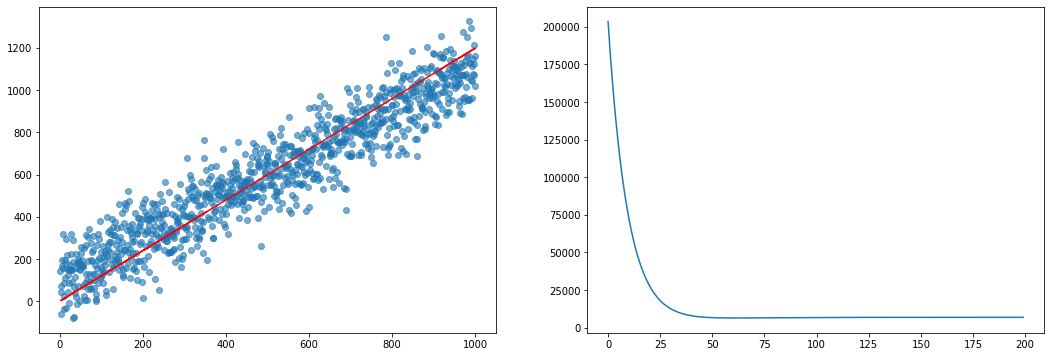

In [92]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))

y_predicted = np.matmul(X_test, theta)

ax[0].scatter(x, y, alpha=.6)
ax[0].plot(X_test[:,1], y_predicted, color='red')
ax[1].plot(J_history)

plt.show()